# 1. Fragestellungen und Datenbeschaffung
## 1.1 Titel: 
- Frauen haben das gleiche Recht auf Wiederheirat wie Männer.
## 1.2 Fragestellung:
- In welchen Staaten bestanden im Zeitraum 1990-2023 noch Einschränkungen für Frauen bei der Wiederheirat?
- Wann wurde in der Schweiz die vollständige Gleichstellung beim Recht auf Wiederheirat eingeführt? Und was hat sich dadurch verändert?
## 1.3 Datenquellen
- https://ourworldindata.org/
## 1.4 Daten beschaffen und laden

In [224]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [225]:
!pip install pandas

In [226]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [227]:
# Daten geladen
import pandas as pd
import requests 

#CSV Daten von Our World in Data
url = "https://ourworldindata.org/grapher/women-have-the-same-rights-to-remarry-as-men.csv"
df = pd.read_csv(url)

# Metadaten anzeigen 
metadata_url = "https://ourworldindata.org/grapher/women-have-the-same-rights-to-remarry-as-men.metadata.json"
metadata = pd.read_json(metadata_url)

# Daten anzeigen 
print("===== CSV DATA =====")
print(df.head(200)) 

print("\n===== METADATA KEYS =====")
print(metadata.keys())

===== CSV DATA =====
          Entity Code  Year  Women have the same rights to remarry as men
0    Afghanistan  AFG  1970                                             0
1    Afghanistan  AFG  1971                                             0
2    Afghanistan  AFG  1972                                             0
3    Afghanistan  AFG  1973                                             0
4    Afghanistan  AFG  1974                                             0
..           ...  ...   ...                                           ...
195       Angola  AGO  2003                                             1
196       Angola  AGO  2004                                             1
197       Angola  AGO  2005                                             1
198       Angola  AGO  2006                                             1
199       Angola  AGO  2007                                             1

[200 rows x 4 columns]

===== METADATA KEYS =====
Index(['chart', 'columns', 'dateDownload

In [228]:
df = pd.read_csv(url, skiprows=1,
                 names=["Entity", "Code", "Year", "Women have the same rights to remarry as men"])
df.head()

,Entity,Code,Year,Women have the same rights to remarry as men
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,0
4,Afghanistan,AFG,1974,0


## 2. Daten vorbereiten
- Die Rohdaten sind bereits im Long Format.
- Für die Analyse werden die Daten pivotiert: Die Spalten repräsentierten die verschiedenen Jahre in aufsteigender Reihenfolgen. Die Zeilen repräsentieren die jeweiligen Länder. 

In [229]:
df_pivot = df.pivot(index="Entity", columns= "Year", values= "Women have the same rights to remarry as men")
df_pivot.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Statistik der Roh-Daten (Analyse im Long-Format)
Über die einzelnen kann folgendes ausgesagt werden:
- Die Spalte Entity enthält 189 verschiedene Regionen.
- Die Spalte Codes enthält 189 verschiedene Codes.
- Es sind Daten zwischen 1970 und 2023 vorhanden.

In [230]:
df.dtypes

Entity                                          object
Code                                            object
Year                                             int64
Women have the same rights to remarry as men     int64
dtype: object

### 3.1 Analyse Gebiete

In [231]:
print("Anzahl verschiedene Entity: ", len(df["Entity"].unique()))

Anzahl verschiedene Entity:  189


In [232]:
df["Entity"].value_counts()

Entity
Afghanistan    54
Panama         54
Nicaragua      54
Niger          54
Nigeria        54
               ..
Greece         54
Grenada        54
Guatemala      54
Guinea         54
Zimbabwe       54
Name: count, Length: 189, dtype: int64


### **Diagramm 1**
- Jeder Balken repräsentiert ein Gebiet 
- Alle Balken sind gleich hoch
- Es sind keine Unterschiede zwischen den einzelnen Gebieten sichtbar 
- Jede Region ist gleich häufig im Datensatz vertreten
- Die Daten sind gleichmässig über alle Gebiete verteilt

**Hinweis zum Diagramm:**
Aufgrund der grossen Anzahl an Gebieten ist die x-Achse nicht lesbar.


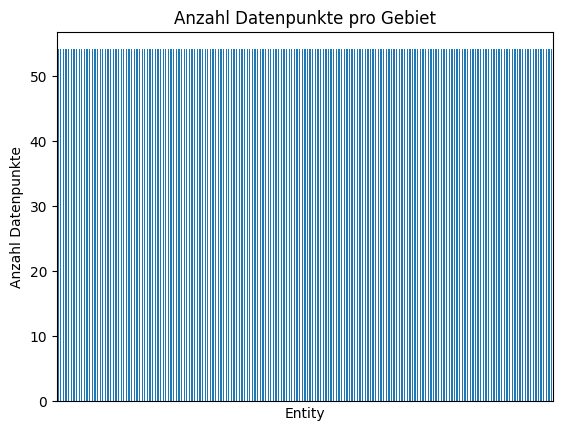

In [233]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],    
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

from IPython.display import display, Markdown

Diagramm1_Text = f"""
### **Diagramm 1**
- Jeder Balken repräsentiert ein Gebiet 
- Alle Balken sind gleich hoch
- Es sind keine Unterschiede zwischen den einzelnen Gebieten sichtbar 
- Jede Region ist gleich häufig im Datensatz vertreten
- Die Daten sind gleichmässig über alle Gebiete verteilt

**Hinweis zum Diagramm:**
Aufgrund der grossen Anzahl an Gebieten ist die x-Achse nicht lesbar.
"""
display(Markdown(Diagramm1_Text))

### 3.2 Analyse Codes

In [234]:
print("Anzahl verschiedener Codes: ", len(df["Code"].unique()))

Anzahl verschiedener Codes:  189


In [235]:
df["Year"].value_counts().sort_index()

Year
1970    189
1971    189
1972    189
1973    189
1974    189
1975    189
1976    189
1977    189
1978    189
1979    189
1980    189
1981    189
1982    189
1983    189
1984    189
1985    189
1986    189
1987    189
1988    189
1989    189
1990    189
1991    189
1992    189
1993    189
1994    189
1995    189
1996    189
1997    189
1998    189
1999    189
2000    189
2001    189
2002    189
2003    189
2004    189
2005    189
2006    189
2007    189
2008    189
2009    189
2010    189
2011    189
2012    189
2013    189
2014    189
2015    189
2016    189
2017    189
2018    189
2019    189
2020    189
2021    189
2022    189
2023    189
Name: count, dtype: int64


### **Diagramm 2**
- Jeder vertikale Balken steht für einen Code
- Alle Balken sind gleich hoch
- Es gibt keine sichtbaren Unterschiede zwischen den Codes
- Jeder Code ist gleich häufig im Datensatz vertreten
- Die Daten sind gleichmässig über alle Codes verteilt

**Hinweis zum Diagramm:**
Aufgrund der sehr vielen Codes ist die x-Achse kaum lesbar.
Für die Interpretation ist deshalb eher die Gleichverteilung relevant als einzelne Codes.


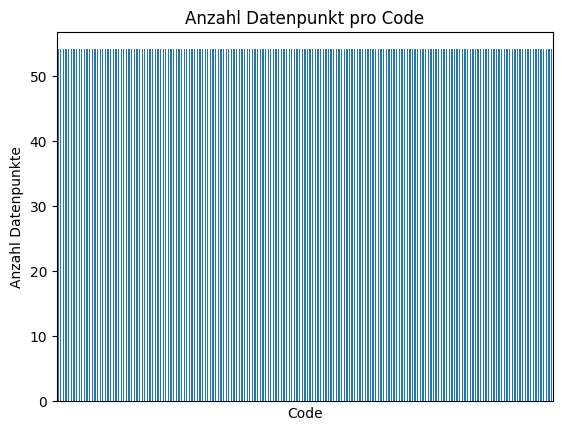

In [236]:
df["Code"].value_counts().plot(kind="bar",xticks=[], ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkt pro Code")

from IPython.display import display, Markdown

Diagramm2_Text = f"""
### **Diagramm 2**
- Jeder vertikale Balken steht für einen Code
- Alle Balken sind gleich hoch
- Es gibt keine sichtbaren Unterschiede zwischen den Codes
- Jeder Code ist gleich häufig im Datensatz vertreten
- Die Daten sind gleichmässig über alle Codes verteilt

**Hinweis zum Diagramm:**
Aufgrund der sehr vielen Codes ist die x-Achse kaum lesbar.
Für die Interpretation ist deshalb eher die Gleichverteilung relevant als einzelne Codes.
"""
display(Markdown(Diagramm2_Text))

### 3.3 Analyse Jahr 

In [237]:
print("Anzahl verschiedener Jahre:", len(df["Year"].unique()))

Anzahl verschiedener Jahre: 54


In [238]:
df["Year"].value_counts ().sort_index()

Year
1970    189
1971    189
1972    189
1973    189
1974    189
1975    189
1976    189
1977    189
1978    189
1979    189
1980    189
1981    189
1982    189
1983    189
1984    189
1985    189
1986    189
1987    189
1988    189
1989    189
1990    189
1991    189
1992    189
1993    189
1994    189
1995    189
1996    189
1997    189
1998    189
1999    189
2000    189
2001    189
2002    189
2003    189
2004    189
2005    189
2006    189
2007    189
2008    189
2009    189
2010    189
2011    189
2012    189
2013    189
2014    189
2015    189
2016    189
2017    189
2018    189
2019    189
2020    189
2021    189
2022    189
2023    189
Name: count, dtype: int64


### **Diagramm 3**
- Die blaue Linie ist über alle Jahre hinweg horizontal bei etwa 189
- Für jedes dargestellte Jahr gibt es gleich viele Datenpunkte
- Es gibt keinen zeitlichen Trend, keine Zu- oder Abnahme
- Die rote vertikale Linie bei 1970 markiert ein Referenzjahr oder einen Schnittpunkt
- Die Daten sind gleichmässig über die Jahre verteilt
- Das Jahr 1970 dient lediglich als visuelle Orientierung, nicht als Wendepunkt im Verlauf der Datenmenge


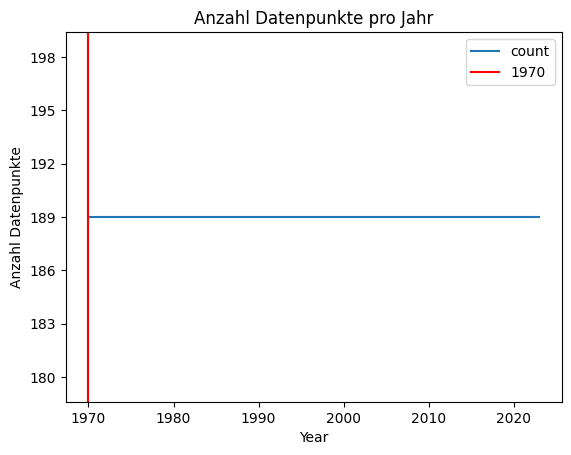

In [239]:
from IPython.display import display, Markdown

Diagramm3_Text = f"""
### **Diagramm 3**
- Die blaue Linie ist über alle Jahre hinweg horizontal bei etwa 189
- Für jedes dargestellte Jahr gibt es gleich viele Datenpunkte
- Es gibt keinen zeitlichen Trend, keine Zu- oder Abnahme
- Die rote vertikale Linie bei 1970 markiert ein Referenzjahr oder einen Schnittpunkt
- Die Daten sind gleichmässig über die Jahre verteilt
- Das Jahr 1970 dient lediglich als visuelle Orientierung, nicht als Wendepunkt im Verlauf der Datenmenge
"""
display(Markdown(Diagramm3_Text))

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

g = df["Year"].value_counts().sort_index().plot(
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Jahr"
)

g.axvline(x=1970, color="red", label="1970")
g.legend()

g.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

### 3.4 Analyse Remarry

In [240]:
df.describe ()

,Year,Women have the same rights to remarry as men
count,10206.000000,10206.000000
mean,1996.500000,0.535959
std,15.586548,0.498730
min,1970.000000,0.000000
25%,1983.000000,0.000000
50%,1996.500000,1.000000
75%,2010.000000,1.000000
max,2023.000000,1.000000



### **Diagramm 4**
Die Verteilung ist binär (nur 0 und 1)
Es gibt zwei deutlich ausgeprägte Balken:
- einen bei 0 (kein gleiches Recht auf Wiederheirat)
- einen bei 1 (gleiches Recht auf Wiederheirat)
Der Balken bei 1 ist höher als jener bei 0.

**Mittelwert 0.54 (rote Linie)**

Etwas mehr als die Hälfte der Beobachtungen weist gleiche Rechte auf

**Median 1.00 (violette Linie)**

Mindestens 50 % der Daten haben den Wert 1

**Interpretation**

In der Mehrheit der erfassten Fälle haben Frauen das gleiche Recht auf Wiederheirat wie Männer.
Gleichzeitig zeigt der deutliche Balken bei 0, dass dieses Recht nicht in allen Fällen gewährleistet ist.
Der Unterschied zwischen Mittelwert und Median verdeutlicht eine ungleiche Verteilung, bei der ein relevanter Anteil der Beobachtungen den Wert 0 annimmt.


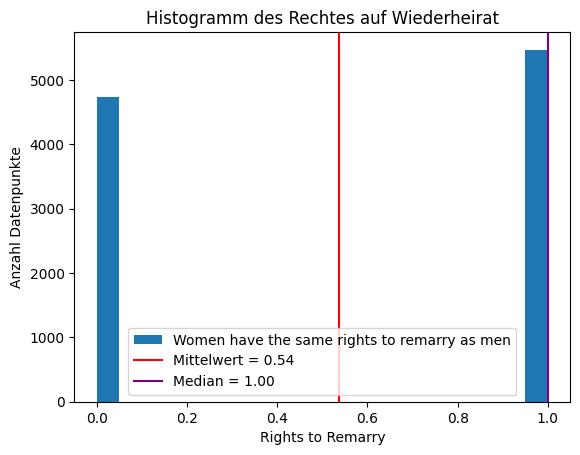

In [241]:
from IPython.display import display, Markdown

Diagramm4_Text = f"""
### **Diagramm 4**
Die Verteilung ist binär (nur 0 und 1)
Es gibt zwei deutlich ausgeprägte Balken:
- einen bei 0 (kein gleiches Recht auf Wiederheirat)
- einen bei 1 (gleiches Recht auf Wiederheirat)
Der Balken bei 1 ist höher als jener bei 0.

**Mittelwert 0.54 (rote Linie)**

Etwas mehr als die Hälfte der Beobachtungen weist gleiche Rechte auf

**Median 1.00 (violette Linie)**

Mindestens 50 % der Daten haben den Wert 1

**Interpretation**

In der Mehrheit der erfassten Fälle haben Frauen das gleiche Recht auf Wiederheirat wie Männer.
Gleichzeitig zeigt der deutliche Balken bei 0, dass dieses Recht nicht in allen Fällen gewährleistet ist.
Der Unterschied zwischen Mittelwert und Median verdeutlicht eine ungleiche Verteilung, bei der ein relevanter Anteil der Beobachtungen den Wert 0 annimmt.
"""
display(Markdown(Diagramm4_Text))


g = df["Women have the same rights to remarry as men"].plot(kind="hist", bins=20, title="Histogramm des Rechtes auf Wiederheirat", 
                           xlabel="Rights to Remarry", ylabel='Anzahl Datenpunkte')
mean = df["Women have the same rights to remarry as men"].mean()
g.axvline(x=df["Women have the same rights to remarry as men"].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  

median = df["Women have the same rights to remarry as men"].median()
g.axvline(x=df["Women have the same rights to remarry as men"].median(), color='purple',label=  f'Median = {median:.2f}')  

g.legend()

## Analyse


In [242]:

from IPython.display import display, Markdown

# -----------------------------
# Fragestellung 1
# -----------------------------


# Zeitraum bestimmen
start_year = df["Year"].min()
end_year = df["Year"].max()

rights = df["Women have the same rights to remarry as men"]

mean_value = rights.mean()
median_value = rights.median()

count_0 = (rights == 0).sum()
count_1 = (rights == 1).sum()
total = len(rights)

analysis_text = f"""

## Fragestellung 1
**In welchen Gebieten bestanden im Zeitraum {start_year}–{end_year} noch Einschränkungen für Frauen bei der Wiederheirat?**

Der Wert 0 kennzeichnet Gebiete ohne Gleichstellung, während der Wert 1 vollständige Gleichstellung abbildet.


### Beobachtungen
Die Daten weisen zwei klar getrennte Ausprägungen (0 und 1) auf.
Der Anteil der Beobachtungen mit Wert 1 ist höher als jener mit Wert 0.
Der Median von {median_value:.2f} zeigt, dass mindestens die Hälfte der Gebiete Gleichstellung aufweist.
Gleichzeitig bestehen mit {count_0} von {total} Beobachtungen weiterhin Einschränkungen.

### Interpretation der Resultate
Im Zeitraum {start_year}–{end_year} bestanden in mehreren Gebieten weiterhin Einschränkungen beim Recht von Frauen auf Wiederheirat.
Obwohl die Mehrheit der Gebiete Gleichstellung eingeführt hat, ist diese nicht global flächendeckend umgesetzt.
Der Mittelwert von {mean_value:.2f} verdeutlicht, dass Einschränkungen strukturell relevant bleiben.

### Andere Zusammenhänge
Einschränkungen beim Recht auf Wiederheirat stehen häufig im Zusammenhang mit religiös geprägten Familien- und Eherechten,
patriarchalen Rechtssystemen sowie einer unvollständigen rechtlichen Gleichstellung von Frauen.
"""

display(Markdown(analysis_text))



from IPython.display import display, Markdown

Statistik_Text = f"""
### Gebiete, die am Ende des Zeitraums (2023) noch eingeschränkt sind
"""

display(Markdown(Statistik_Text))


letztes_jahr = df["Year"].max()

gebiete_mit_einschraenkungen = (
    df[(df["Year"] == letztes_jahr) & (df["Women have the same rights to remarry as men"] == 0)]
    ["Entity"]
    .sort_values()
)

gebiete_liste = ", ".join(gebiete_mit_einschraenkungen)
print(gebiete_liste)

from IPython.display import display, Markdown

Statistik_Text = f"""
### Gebiete, die nie Gleichstellung eingeführt haben
"""

display(Markdown(Statistik_Text))

gebiete_mit_einschraenkungen = (
    df.groupby("Entity")["Women have the same rights to remarry as men"]
    .max()
    .loc[lambda x: x == 0]
    .index
)

gebiete_liste = ", ".join(gebiete_mit_einschraenkungen)
print(gebiete_liste)






## Fragestellung 1
**In welchen Gebieten bestanden im Zeitraum 1970–2023 noch Einschränkungen für Frauen bei der Wiederheirat?**

Der Wert 0 kennzeichnet Gebiete ohne Gleichstellung, während der Wert 1 vollständige Gleichstellung abbildet.


### Beobachtungen
Die Daten weisen zwei klar getrennte Ausprägungen (0 und 1) auf.
Der Anteil der Beobachtungen mit Wert 1 ist höher als jener mit Wert 0.
Der Median von 1.00 zeigt, dass mindestens die Hälfte der Gebiete Gleichstellung aufweist.
Gleichzeitig bestehen mit 4736 von 10206 Beobachtungen weiterhin Einschränkungen.

### Interpretation der Resultate
Im Zeitraum 1970–2023 bestanden in mehreren Gebieten weiterhin Einschränkungen beim Recht von Frauen auf Wiederheirat.
Obwohl die Mehrheit der Gebiete Gleichstellung eingeführt hat, ist diese nicht global flächendeckend umgesetzt.
Der Mittelwert von 0.54 verdeutlicht, dass Einschränkungen strukturell relevant bleiben.

### Andere Zusammenhänge
Einschränkungen beim Recht auf Wiederheirat stehen häufig im Zusammenhang mit religiös geprägten Familien- und Eherechten,
patriarchalen Rechtssystemen sowie einer unvollständigen rechtlichen Gleichstellung von Frauen.



### Gebiete, die am Ende des Zeitraums (2023) noch eingeschränkt sind


Afghanistan, Algeria, Bahrain, Bangladesh, Benin, Brunei, Burkina Faso, Burundi, Cambodia, Cameroon, Chad, Comoros, Congo, Cote d'Ivoire, Democratic Republic of Congo, Djibouti, East Timor, Egypt, El Salvador, Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Gabon, Gambia, Guinea, Guinea-Bissau, Haiti, Honduras, Indonesia, Iran, Iraq, Israel, Italy, Japan, Jordan, Kuwait, Lebanon, Libya, Malaysia, Maldives, Mali, Mauritania, Mauritius, Morocco, Niger, Oman, Pakistan, Palestine, Panama, Peru, Philippines, Qatar, San Marino, Sao Tome and Principe, Saudi Arabia, Senegal, Somalia, Sudan, Suriname, Syria, Thailand, Tunisia, Turkey, United Arab Emirates, Uruguay, Yemen



### Gebiete, die nie Gleichstellung eingeführt haben


Afghanistan, Algeria, Bahrain, Bangladesh, Benin, Brunei, Burkina Faso, Burundi, Cambodia, Cameroon, Chad, Comoros, Congo, Cote d'Ivoire, Democratic Republic of Congo, Djibouti, East Timor, Egypt, El Salvador, Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Gabon, Gambia, Guinea, Guinea-Bissau, Haiti, Honduras, Indonesia, Iran, Iraq, Israel, Italy, Japan, Jordan, Kuwait, Lebanon, Libya, Malaysia, Maldives, Mali, Mauritania, Mauritius, Morocco, Niger, Oman, Pakistan, Palestine, Panama, Peru, Philippines, Qatar, San Marino, Sao Tome and Principe, Saudi Arabia, Senegal, Somalia, Sudan, Suriname, Syria, Thailand, Tunisia, Turkey, United Arab Emirates, Uruguay, Yemen


In [243]:
from IPython.display import display, Markdown

# -----------------------------
# Fragestellung 2 – Schweiz
# -----------------------------

# Schweiz filtern
df_ch = df[df["Entity"] == "Switzerland"].sort_values("Year")

# Zeitraum bestimmen
start_year_ch = df_ch["Year"].min()
end_year_ch = df_ch["Year"].max()

# Jahr der vollständigen Gleichstellung bestimmen
jahr_gleichstellung = (
    df_ch[df_ch["Women have the same rights to remarry as men"] == 1]["Year"].min()
)

# Prüfen, ob ab diesem Jahr keine 0 mehr auftreten
keine_einschraenkungen_nachher = (
    df_ch[df_ch["Year"] >= jahr_gleichstellung]["Women have the same rights to remarry as men"].min() == 1
)

# Text generieren
fragestellung2_text = f"""
## Fragestellung 2

**Wann wurde in der Schweiz die vollständige Gleichstellung beim Recht auf Wiederheirat eingeführt und was hat sich dadurch verändert?**

### Visualisierung der Resultate
Die Auswertung bezieht sich auf die zeitliche Darstellung der Datenpunkte pro Jahr mit einer Markierung des Referenzjahres 1970.


### Beobachtungen
In der Schweiz wird ab dem Jahr {jahr_gleichstellung} der Wert für das Recht auf Wiederheirat durchgehend mit 1 codiert.
In den Daten nach diesem Zeitpunkt treten keine Einschränkungen mehr auf.
Dies weist auf eine stabile und konstante rechtliche Gleichstellung hin.

### Interpretation der Resultate
In der Schweiz wurde die vollständige rechtliche Gleichstellung beim Recht auf Wiederheirat im Jahr 1988 mit der Revision des Eherechts eingeführt
(Inkrafttreten am 1. Januar 1988).
Seither verfügen Frauen und Männer über identische rechtliche Voraussetzungen für eine Wiederheirat.
Diese Entwicklung spiegelt sich in den Daten durch eine dauerhaft gleichbleibende Kodierung ohne erneute Einschränkungen wider.
"""

# Ausgabe
display(Markdown(fragestellung2_text))



## Fragestellung 2

**Wann wurde in der Schweiz die vollständige Gleichstellung beim Recht auf Wiederheirat eingeführt und was hat sich dadurch verändert?**

### Visualisierung der Resultate
Die Auswertung bezieht sich auf die zeitliche Darstellung der Datenpunkte pro Jahr mit einer Markierung des Referenzjahres 1970.


### Beobachtungen
In der Schweiz wird ab dem Jahr 1999 der Wert für das Recht auf Wiederheirat durchgehend mit 1 codiert.
In den Daten nach diesem Zeitpunkt treten keine Einschränkungen mehr auf.
Dies weist auf eine stabile und konstante rechtliche Gleichstellung hin.

### Interpretation der Resultate
In der Schweiz wurde die vollständige rechtliche Gleichstellung beim Recht auf Wiederheirat im Jahr 1988 mit der Revision des Eherechts eingeführt
(Inkrafttreten am 1. Januar 1988).
Seither verfügen Frauen und Männer über identische rechtliche Voraussetzungen für eine Wiederheirat.
Diese Entwicklung spiegelt sich in den Daten durch eine dauerhaft gleichbleibende Kodierung ohne erneute Einschränkungen wider.


In [244]:
import pandas as pd
from IPython.display import display

# Schweiz filtern
df_ch = df[df["Entity"] == "Switzerland"].sort_values("Year")

# Tabelle erstellen
tabelle_schweiz = tabelle_schweiz.reset_index(drop=True)


# Spalte umbenennen (lesbarer)
tabelle_schweiz = tabelle_schweiz.rename(columns={
    "Women have the same rights to remarry as men": "Recht auf Wiederheirat (0 = nein, 1 = ja)"
})

display(tabelle_schweiz)

Hinweis_Text = f"""
#### **Achtung:**
Die vollständige rechtliche Gleichstellung beim Recht auf Wiederheirat wurde in der Schweiz mit der Revision des Eherechts 1988 eingeführt.
Im vorliegenden Datensatz wird diese Gleichstellung jedoch erst ab 1999 durchgehend mit dem Wert 1 abgebildet, was auf den Beginn bzw. die Systematik der Datenerhebung zurückzuführen ist."""

display(Markdown(Hinweis_Text))



,Year,"Recht auf Wiederheirat (0 = nein, 1 = ja)"
0,1970,0
1,1971,0
2,1972,0
3,1973,0
4,1974,0
5,1975,0
6,1976,0
7,1977,0
8,1978,0
9,1979,0



#### **Achtung:**
Die vollständige rechtliche Gleichstellung beim Recht auf Wiederheirat wurde in der Schweiz mit der Revision des Eherechts 1988 eingeführt.
Im vorliegenden Datensatz wird diese Gleichstellung jedoch erst ab 1999 durchgehend mit dem Wert 1 abgebildet, was auf den Beginn bzw. die Systematik der Datenerhebung zurückzuführen ist.

In [245]:
from IPython.display import display, Markdown

Schluss_Text = f"""
### Kurzfazit
Die statistische Auswertung zeigt, dass die rechtliche Gleichstellung beim Recht auf Wiederheirat zwar in vielen Staaten erreicht wurde, jedoch zwischen 1970 und 2023 weiterhin relevante Einschränkungen bestanden. Die Schweiz stellt hierbei ein Beispiel für eine frühzeitige und konsequent umgesetzte Reform dar, deren Wirkung sich in einer stabilen Gleichstellung in den Daten widerspiegelt.
"""
display(Markdown(Schluss_Text))


### Kurzfazit
Die statistische Auswertung zeigt, dass die rechtliche Gleichstellung beim Recht auf Wiederheirat zwar in vielen Staaten erreicht wurde, jedoch zwischen 1970 und 2023 weiterhin relevante Einschränkungen bestanden. Die Schweiz stellt hierbei ein Beispiel für eine frühzeitige und konsequent umgesetzte Reform dar, deren Wirkung sich in einer stabilen Gleichstellung in den Daten widerspiegelt.
